### Load magic functions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load required packages

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sns.set(context='notebook', style='darkgrid')

In [5]:
! ls ../output_data/

nse_500_company_info.csv


### Read companies info data

In [6]:
input_data_folder = '../modular_code/output_files/'

In [7]:
os.listdir(input_data_folder)

['.DS_Store', 'companies_info_data_2019-10-14.csv']

In [8]:
nse_500_info = pd.read_csv(os.path.join(input_data_folder, 'companies_info_data_2019-10-14.csv'))
nse_500_info.head()
nse_500_info.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0
1,ACC,27593.0,1469.0,584.47,15.99,0.95,15.86,15.14,8.13,10.0
2,AIAENG,16188.0,1717.0,336.80,41.22,0.52,17.45,12.34,15.96,2.0
3,APLAPOLLO,3279.0,1352.0,415.57,27.34,1.02,16.31,13.15,25.78,10.0
4,AUBANK,18888.0,643.7,68.15,38.13,0.12,8.97,14.70,41.16,10.0


(501, 10)

In [9]:
nse_500_info.isna().sum()

symbol                0
market_cap            0
current_price         0
book_value            1
stock_pe             41
dividend_yield        1
roce                  1
roe                   2
sales_growth_3yrs    12
face_value            0
dtype: int64

In [10]:
nse_500_info.sample(5)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
19,ALKEM,23219.0,1942.00,457.09,26.36,0.82,17.09,15.48,13.47,2.0
68,BSOFT,1746.0,63.15,42.83,12.61,3.14,13.37,11.86,-7.40,2.0
163,GILLETTE,23630.0,7251.00,238.83,93.43,0.32,59.81,38.92,-3.73,10.0
138,EQUITAS,3448.0,100.90,52.72,348.65,0.00,0.78,0.52,36.07,10.0
263,JCHAC,5338.0,1963.00,225.45,54.03,0.08,20.00,14.97,10.96,10.0


### Missing stock_p/e
-  Companies that are losing money do not have a P/E ratio

In [11]:
row_ind = nse_500_info['stock_pe'].isna() == True
nse_500_info[row_ind]

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
8,ADANIGREEN,12317.00,78.75,13.80,NaN,0.00,5.72,-2.45,NaN,10.0
10,ADANIPOWER,24029.00,62.30,44.41,NaN,0.00,5.11,-2.40,-42.63,10.0
12,ABCAPITAL,17147.00,77.85,33.12,NaN,0.00,1.29,0.27,190.00,10.0
20,ALBK,9528.00,25.60,24.53,NaN,0.00,0.92,-85.92,-3.70,10.0
25,ANDHRABANK,4730.00,15.85,44.11,NaN,0.00,4.08,-23.24,2.39,10.0
40,BASF,4121.00,951.90,326.38,NaN,0.53,1.33,-2.45,8.26,10.0
54,BANKINDIA,19678.00,60.05,127.20,NaN,0.00,2.98,-15.48,-0.83,10.0
55,MAHABANK,5882.00,10.10,9.85,NaN,0.00,1.28,-61.01,-5.98,10.0
64,BHARTIARTL,201968.00,393.55,191.66,NaN,0.49,0.01,-4.42,-6.30,5.0
72,BBTC,8026.00,1150.00,36.84,NaN,0.09,2.08,-7.69,0.14,2.0


### Drop missing values?

In [12]:
# companies_info = nse_500_info.dropna(how='any').reset_index(drop=True)

In [13]:
# companies_info.shape
# companies_info.isna().sum()

In [14]:
# companies_info.head(5)

### Merge Industry column in data

In [15]:
nse_500_companies = pd.read_csv('../data/ind_nifty500list.csv')
nse_500_companies.columns = [c.lower().replace(' ', '_') for c in nse_500_companies.columns]
nse_500_companies.head()

,company_name,industry,symbol,series,isin_code
0,3M India Ltd.,SERVICES,3MINDIA,EQ,INE470A01017
1,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
2,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,AIAENG,EQ,INE212H01026
3,APL Apollo Tubes Ltd.,METALS,APLAPOLLO,EQ,INE702C01019
4,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017


In [16]:
nse_500_info.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0
1,ACC,27593.0,1469.0,584.47,15.99,0.95,15.86,15.14,8.13,10.0
2,AIAENG,16188.0,1717.0,336.80,41.22,0.52,17.45,12.34,15.96,2.0
3,APLAPOLLO,3279.0,1352.0,415.57,27.34,1.02,16.31,13.15,25.78,10.0
4,AUBANK,18888.0,643.7,68.15,38.13,0.12,8.97,14.70,41.16,10.0


In [17]:
companies_info = pd.merge(left=nse_500_info, right=nse_500_companies, 
                                    on='symbol',
                                   how='left'
                                  )
companies_info.shape
companies_info.head()

(501, 14)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,company_name,industry,series,isin_code
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,3M India Ltd.,SERVICES,EQ,INE470A01017
1,ACC,27593.0,1469.0,584.47,15.99,0.95,15.86,15.14,8.13,10.0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
2,AIAENG,16188.0,1717.0,336.80,41.22,0.52,17.45,12.34,15.96,2.0,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE212H01026
3,APLAPOLLO,3279.0,1352.0,415.57,27.34,1.02,16.31,13.15,25.78,10.0,APL Apollo Tubes Ltd.,METALS,EQ,INE702C01019
4,AUBANK,18888.0,643.7,68.15,38.13,0.12,8.97,14.70,41.16,10.0,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017


In [18]:
drop_cols = ['company_name', 'series', 'isin_code']

companies_info.drop(labels=drop_cols, axis=1, inplace=True)

In [19]:
companies_info.head()
companies_info.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,27593.0,1469.0,584.47,15.99,0.95,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16188.0,1717.0,336.80,41.22,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3279.0,1352.0,415.57,27.34,1.02,16.31,13.15,25.78,10.0,METALS
4,AUBANK,18888.0,643.7,68.15,38.13,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES


(501, 11)

### Data overview

In [20]:
companies_info.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
market_cap,501.0,27287.0,74659.0,48.0,3235.0,7111.0,18928.0,860856.0
current_price,501.0,1097.0,3722.0,2.0,112.0,310.0,786.0,61723.0
book_value,500.0,276.0,1236.0,-13.0,56.0,111.0,225.0,25126.0
stock_pe,460.0,40.0,97.0,0.0,14.0,24.0,45.0,1937.0
dividend_yield,500.0,2.0,3.0,0.0,0.0,1.0,2.0,37.0
roce,500.0,19.0,17.0,-61.0,8.0,16.0,25.0,143.0
roe,499.0,14.0,20.0,-86.0,7.0,14.0,20.0,298.0
sales_growth_3yrs,489.0,14.0,25.0,-87.0,5.0,11.0,18.0,332.0
face_value,501.0,5.0,4.0,1.0,2.0,5.0,10.0,10.0


#### Correlation

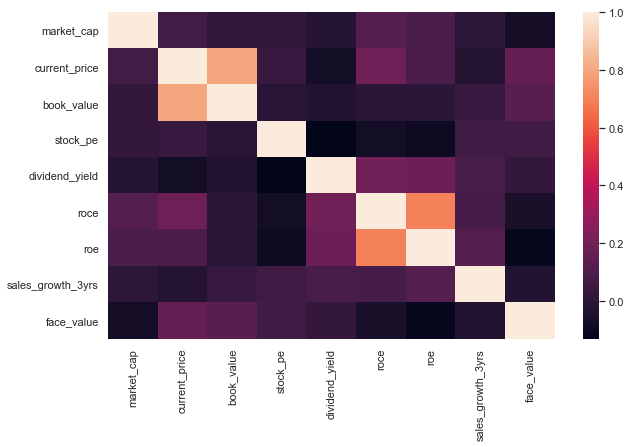

In [21]:
plt.figure(figsize=(10,6))
corr = companies_info.corr()
sns.heatmap(corr)

plt.show();

/Users/manishb-imac/.virtualenvs/clustering-nse/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/manishb-imac/.virtualenvs/clustering-nse/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1512x1512 with 0 Axes>

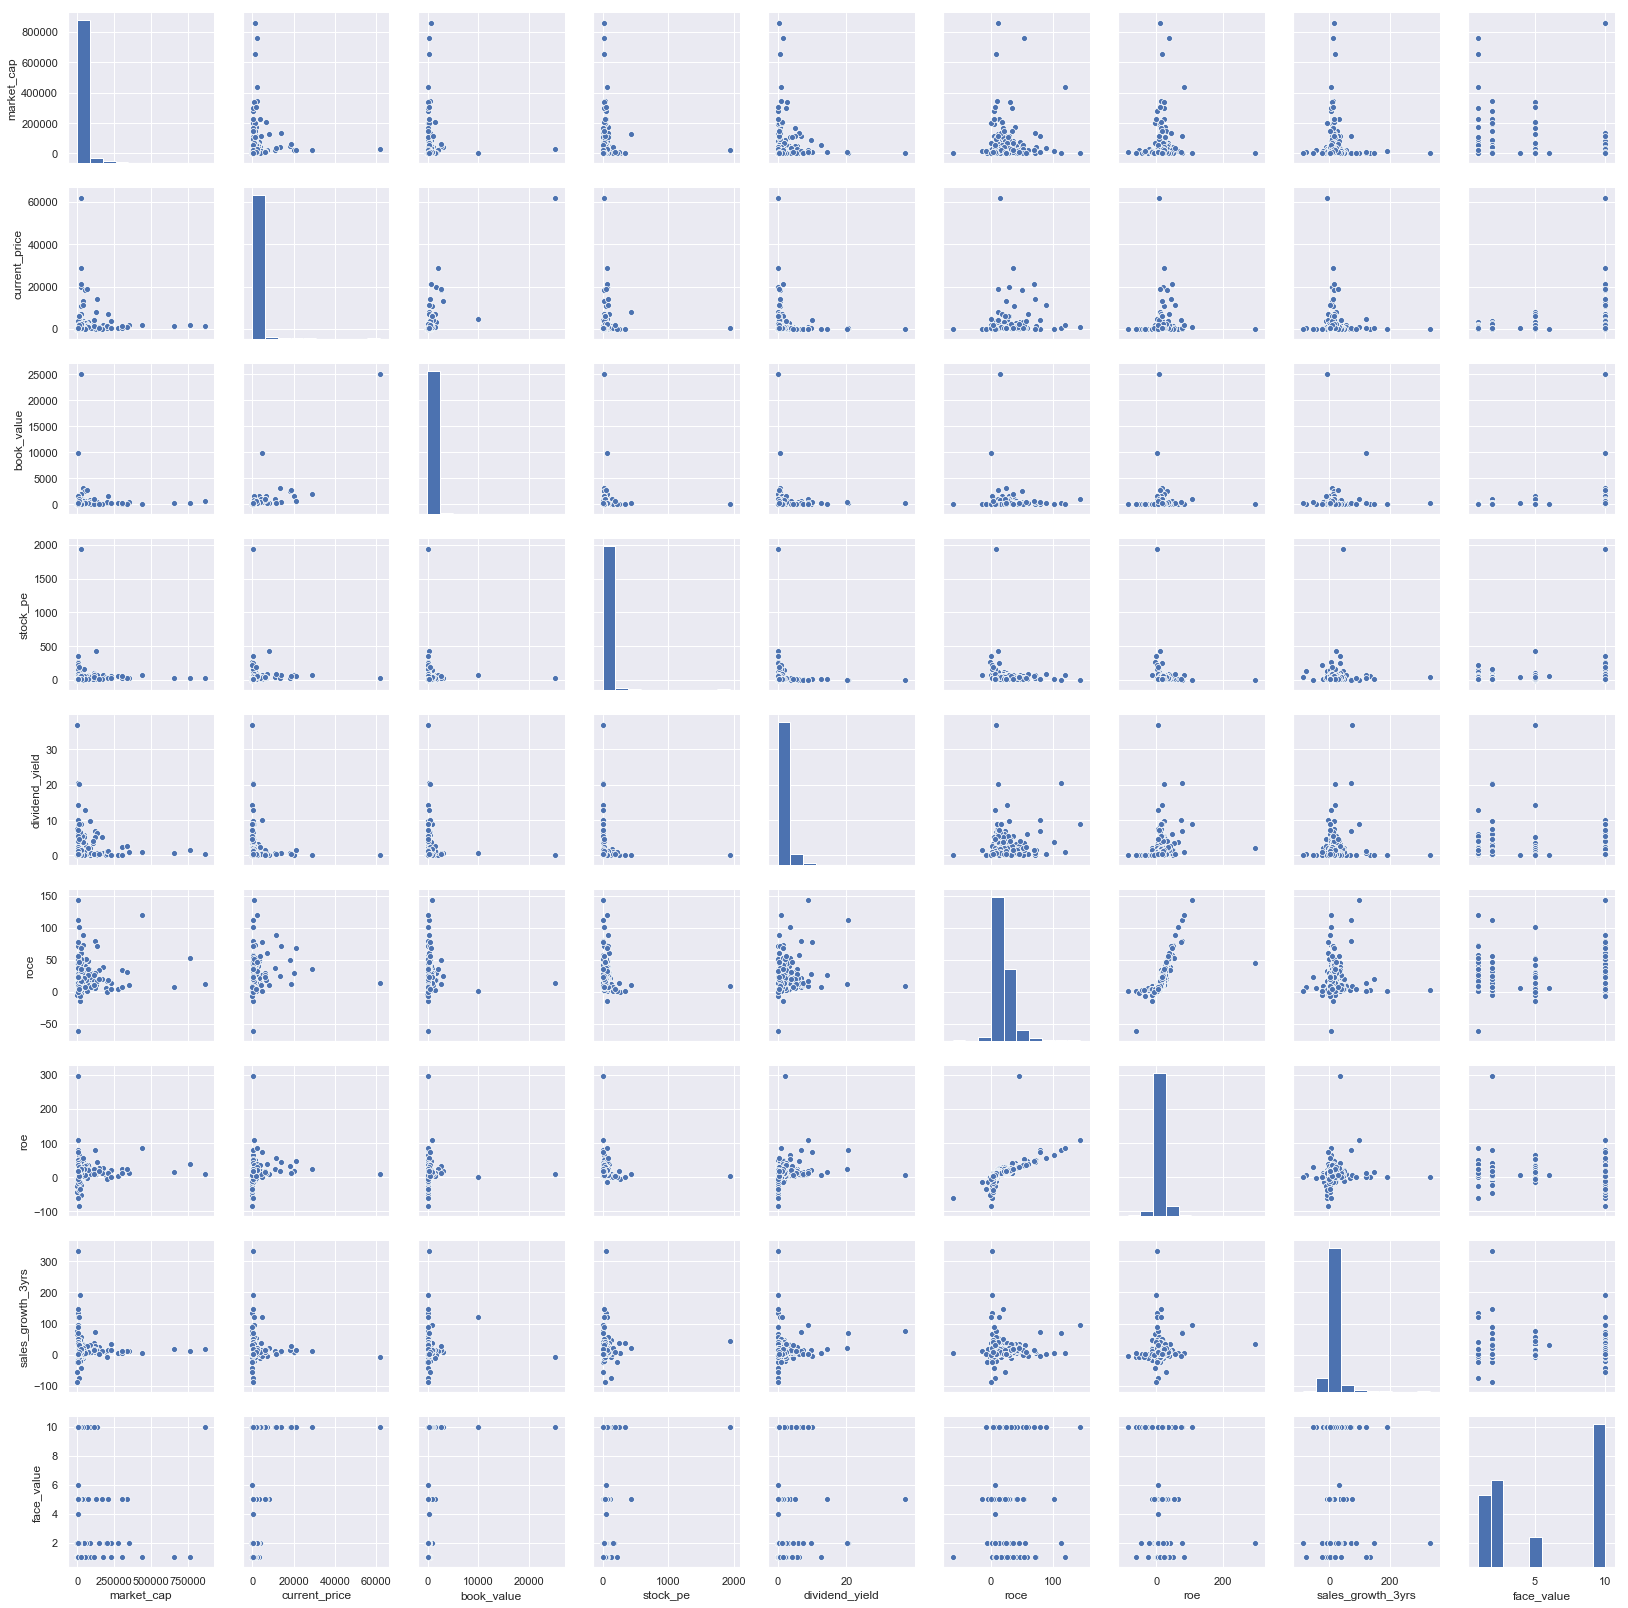

In [22]:
plt.figure(figsize=(21,21));
sns.pairplot(companies_info);

plt.show();

### Plots

#### Distribution plots

##### Market cap plot

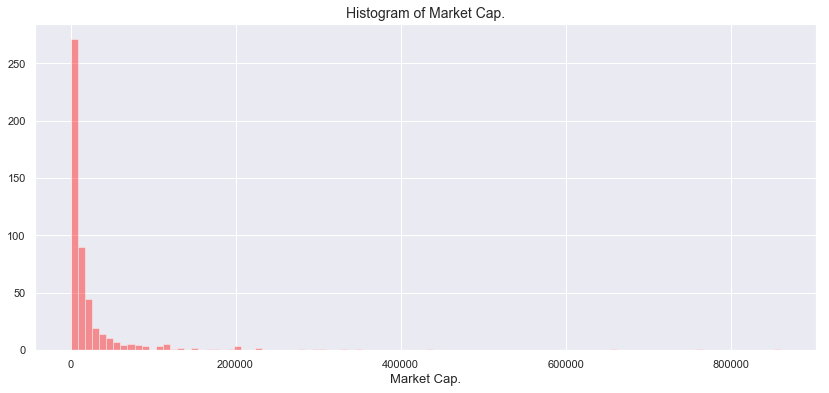

In [23]:
plt.figure(figsize=(14, 6))
sns.distplot(a=companies_info.market_cap, bins=100, kde=False, color='red')
plt.title('Histogram of Market Cap.', fontsize=14)
plt.xlabel('Market Cap.', fontsize=13)
plt.show();

- Most of companies in NSE 500 have market cap. less than 200k Cr.
- GDP of India 21,000 k Cr.

In [24]:
print('No. of companies having market cap greater than 200k Cr. : ')
companies_info.query('market_cap >=200000').shape[0]

No. of companies having market cap greater than 200k Cr. : 


13

##### Top 10 companies contribution to India's GDP

In [25]:
gdp_india = 21000000   # 21,000 k Cr
top_market_cap = companies_info.sort_values(by='market_cap', ascending=False).head(10)
top_market_cap['percentage_gdp'] = round(top_market_cap.market_cap*100/gdp_india, 0)
top_market_cap = top_market_cap.loc[:, ['symbol', 'market_cap', 'industry', 'percentage_gdp']]
top_market_cap

,symbol,market_cap,industry,percentage_gdp
388,RELIANCE,860856.0,ENERGY,4.0
443,TCS,758357.0,IT,4.0
188,HDFCBANK,655835.0,FINANCIAL SERVICES,3.0
204,HINDUNILVR,433969.0,CONSUMER GOODS,2.0
208,HDFC,347886.0,FINANCIAL SERVICES,2.0
241,INFY,335607.0,IT,2.0
282,KOTAKBANK,302835.0,FINANCIAL SERVICES,1.0
222,ITC,299729.0,CONSUMER GOODS,1.0
209,ICICIBANK,277028.0,FINANCIAL SERVICES,1.0
415,SBIN,227979.0,FINANCIAL SERVICES,1.0


- Top 10 companies contribute to 20% of GDP of India in terms of market cap.

In [26]:
companies_info.head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,22462.0,19931.00,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,SERVICES
1,ACC,27593.0,1469.00,584.47,15.99,0.95,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS
2,AIAENG,16188.0,1717.00,336.80,41.22,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3279.0,1352.00,415.57,27.34,1.02,16.31,13.15,25.78,10.0,METALS
4,AUBANK,18888.0,643.70,68.15,38.13,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES
5,AAVAS,12811.0,1639.00,235.00,67.02,0.00,10.86,11.62,54.94,10.0,FINANCIAL SERVICES
6,ABBOTINDIA,23374.0,11000.00,945.22,48.21,0.59,37.36,24.00,12.06,10.0,PHARMA
7,ADANIGAS,16580.0,150.75,10.11,61.40,0.17,24.84,24.06,15.05,1.0,ENERGY
8,ADANIGREEN,12317.0,78.75,13.80,NaN,0.00,5.72,-2.45,NaN,10.0,ENERGY
9,ADANIPORTS,82784.0,407.45,100.86,29.07,0.05,13.41,13.88,4.93,2.0,SERVICES


#### Stock price

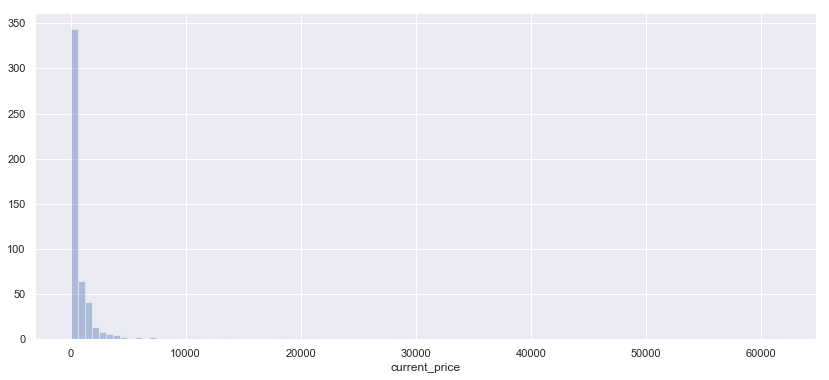

In [27]:
plt.figure(figsize=(14, 6))
sns.distplot(a=companies_info.current_price, kde=False, bins=100)
plt.show();

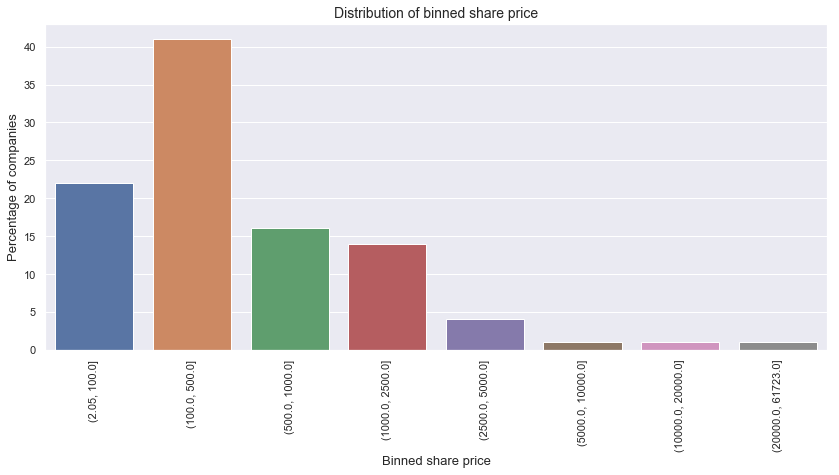

In [28]:
min_price = np.min(companies_info.current_price)
max_price = np.max(companies_info.current_price)
bins=[min_price, 100, 500, 1000, 2500, 5000, 10000, 20000, max_price]
companies_info['stock_price_bucket'] = pd.cut(companies_info.current_price, bins=bins)
# companies_info.stock_price_bucket.head()

stock_price_bin_cnt = companies_info.stock_price_bucket.value_counts(normalize=True).round(2)*100
# stock_price_bin_cnt

plt.figure(figsize=(14, 6))
sns.barplot(x=stock_price_bin_cnt.index, y=stock_price_bin_cnt.values)
plt.title('Distribution of binned share price', fontsize=14)
plt.xlabel('Binned share price', fontsize=13)
plt.ylabel('Percentage of companies', fontsize=13)
plt.xticks(rotation=90)
plt.show();

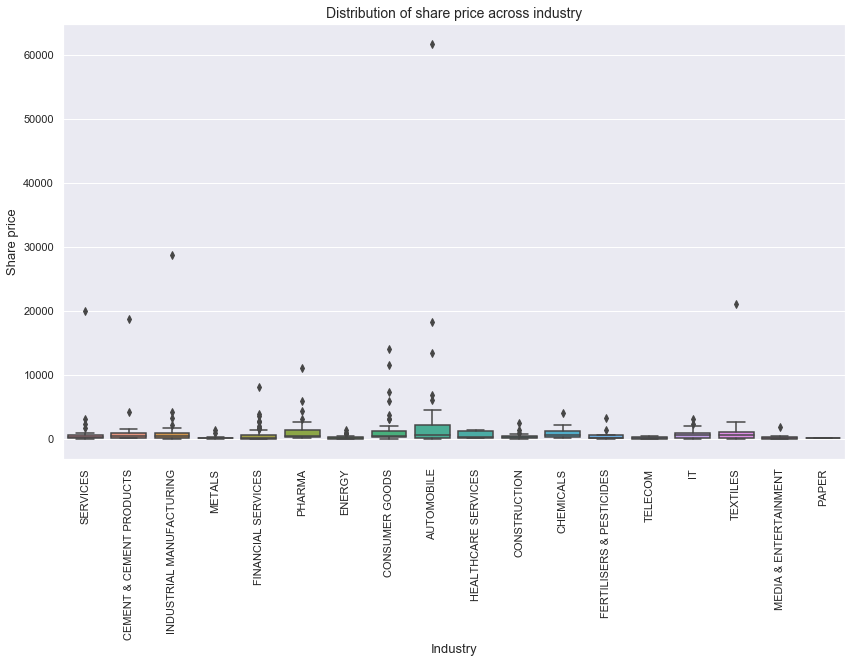

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='industry', y='current_price', data=companies_info, )  # showfliers=False
plt.title('Distribution of share price across industry', fontsize=14)
plt.xlabel('Industry', fontsize=13)
plt.ylabel('Share price', fontsize=13)

plt.xticks(rotation=90)
plt.show();

### No. of companies across industries

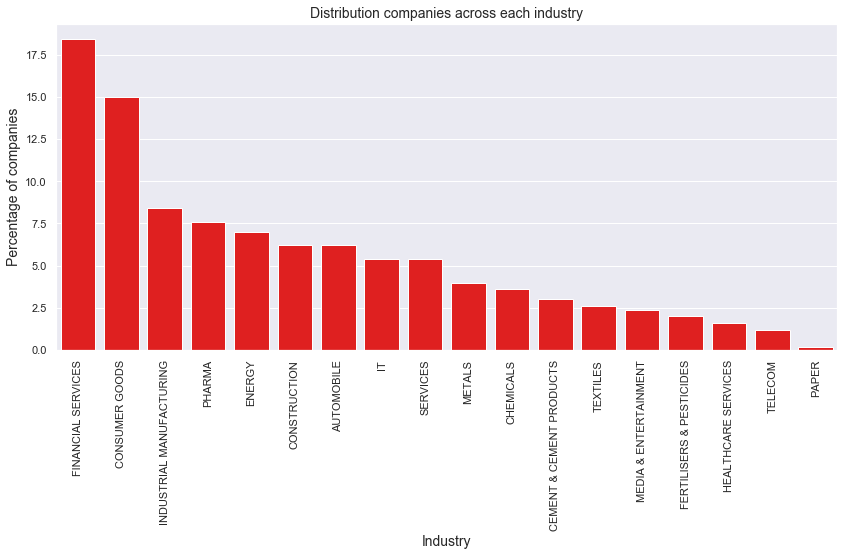

In [30]:
num_companies_industry = round(companies_info.industry.value_counts(normalize=True)*100,1)
# num_companies_industry

plt.figure(figsize=(14, 6))
sns.barplot(x=num_companies_industry.index, 
            y=num_companies_industry.values, color='red')
plt.title('Distribution companies across each industry', fontsize=14)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Percentage of companies', fontsize=14)
plt.xticks(rotation=90)
plt.show();

### Interesting companies

#### Market Cap: top companies

In [31]:
companies_info.sort_values(by=['market_cap'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
388,RELIANCE,860856.0,1358.00,639.40,24.33,0.48,11.45,9.78,16.89,10.0,ENERGY,"(1000.0, 2500.0]"
443,TCS,758357.0,2021.00,228.84,23.22,1.48,52.62,38.77,12.78,1.0,IT,"(1000.0, 2500.0]"
188,HDFCBANK,655835.0,1199.00,272.73,29.75,0.62,7.51,16.50,18.01,1.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
204,HINDUNILVR,433969.0,2005.00,35.38,68.07,1.10,119.00,84.04,7.16,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
208,HDFC,347886.0,2015.00,448.00,32.68,1.04,9.90,13.51,11.94,2.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
241,INFY,335607.0,786.10,136.97,22.80,2.79,31.30,23.09,10.64,5.0,IT,"(500.0, 1000.0]"
282,KOTAKBANK,302835.0,1586.00,224.60,58.23,0.05,7.21,12.07,13.48,5.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
222,ITC,299729.0,243.95,47.17,23.38,2.35,34.00,22.91,7.13,1.0,CONSUMER GOODS,"(100.0, 500.0]"
209,ICICIBANK,277028.0,428.85,167.75,51.39,0.23,4.52,3.15,6.33,2.0,FINANCIAL SERVICES,"(100.0, 500.0]"
415,SBIN,227979.0,255.45,247.53,31.50,0.00,4.58,0.39,13.98,1.0,FINANCIAL SERVICES,"(100.0, 500.0]"


#### Highest share price

In [32]:
companies_info.sort_values(by='current_price', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
298,MRF,26170.0,61723.0,25126.00,23.69,0.10,13.96,9.49,-7.31,10.0,AUTOMOBILE,"(20000.0, 61723.0]"
206,HONAUT,25327.0,28651.0,1977.00,66.44,0.16,35.44,22.66,13.22,10.0,INDUSTRIAL MANUFACTURING,"(20000.0, 61723.0]"
355,PAGEIND,23425.0,21009.0,695.06,61.62,1.64,68.73,47.53,16.68,10.0,TEXTILES,"(20000.0, 61723.0]"
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,SERVICES,"(10000.0, 20000.0]"
405,SHREECEM,65135.0,18696.0,2755.00,55.14,0.32,12.22,11.84,28.58,10.0,CEMENT & CEMENT PRODUCTS,"(10000.0, 20000.0]"
133,EICHERMOT,50016.0,18328.0,2611.00,25.35,0.68,49.88,33.10,16.55,10.0,AUTOMOBILE,"(10000.0, 20000.0]"
337,NESTLEIND,135300.0,14032.0,414.32,80.11,0.82,70.93,45.30,11.37,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
74,BOSCHLTD,39361.0,13345.0,3094.00,26.19,0.79,24.63,16.72,8.11,10.0,AUTOMOBILE,"(10000.0, 20000.0]"
371,PGHH,37329.0,11500.0,280.05,89.06,0.35,89.10,56.85,1.71,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
6,ABBOTINDIA,23374.0,11000.0,945.22,48.21,0.59,37.36,24.00,12.06,10.0,PHARMA,"(10000.0, 20000.0]"


#### Highest sales growth 

In [33]:
companies_info.sort_values(by='sales_growth_3yrs', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
125,DCAL,2581.00,159.90,303.13,47.62,0.13,2.37,1.15,332.00,2.0,PHARMA,"(100.0, 500.0]"
12,ABCAPITAL,17147.00,77.85,33.12,NaN,0.00,1.29,0.27,190.00,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
453,TECHNOE,2960.00,269.05,127.67,17.79,0.00,19.55,13.82,148.00,2.0,CONSTRUCTION,"(100.0, 500.0]"
239,INFIBEAM,2632.00,39.65,39.17,56.00,0.00,1.95,1.14,133.00,1.0,IT,"(2.05, 100.0]"
319,MOTILALOFS,9343.00,634.50,176.13,28.87,1.33,12.99,13.00,122.00,1.0,FINANCIAL SERVICES,"(500.0, 1000.0]"
301,MAHSCOOTER,5116.00,4476.00,9907.00,70.60,0.74,0.75,0.74,120.00,10.0,AUTOMOBILE,"(2500.0, 5000.0]"
185,HEG,3446.00,892.75,963.58,1.37,8.96,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,"(500.0, 1000.0]"
229,IBREALEST,2071.00,45.55,143.88,26.59,0.00,4.57,1.49,88.86,2.0,CONSTRUCTION,"(2.05, 100.0]"
108,COX&KINGS,47.67,2.70,173.17,0.32,37.03,8.55,6.00,76.06,5.0,SERVICES,"(2.05, 100.0]"
101,COALINDIA,117153.00,190.10,22.71,11.17,6.89,79.28,78.45,72.76,10.0,METALS,"(100.0, 500.0]"


#### Top dividend paying companies

In [34]:
companies_info.sort_values(by=['dividend_yield'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
108,COX&KINGS,47.67,2.70,173.17,0.32,37.03,8.55,6.00,76.06,5.0,SERVICES,"(2.05, 100.0]"
172,GRAPHITE,5265.00,269.45,238.13,2.42,20.41,112.00,78.30,71.03,2.0,INDUSTRIAL MANUFACTURING,"(100.0, 500.0]"
227,IBULHSGFIN,8457.00,197.80,403.65,2.53,20.21,12.18,22.73,20.35,2.0,FINANCIAL SERVICES,"(100.0, 500.0]"
333,NATIONALUM,7537.00,40.40,56.20,6.35,14.23,25.99,16.51,19.04,5.0,METALS,"(2.05, 100.0]"
485,VEDL,54940.00,147.80,209.51,12.27,12.76,6.97,6.04,4.26,1.0,METALS,"(100.0, 500.0]"
370,PGHL,7353.00,4429.00,448.07,8.63,9.93,78.16,73.25,-3.32,10.0,PHARMA,"(2500.0, 5000.0]"
205,HINDZINC,87844.00,207.90,79.53,11.26,9.62,28.32,22.10,14.20,2.0,METALS,"(100.0, 500.0]"
185,HEG,3446.00,892.75,963.58,1.37,8.96,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,"(500.0, 1000.0]"
395,SJVN,9530.00,24.25,28.60,6.21,8.87,15.96,12.84,2.12,10.0,ENERGY,"(2.05, 100.0]"
375,RECLTD,24677.00,124.95,173.69,4.26,8.80,9.21,17.31,2.15,10.0,FINANCIAL SERVICES,"(100.0, 500.0]"


#### Top dividen paying industries

In [35]:
companies_info.groupby(by='industry').agg({'dividend_yield': ['mean', 'median']                                                })

dividend_yield       
                                   mean median
industry                                      
AUTOMOBILE                     1.222000  0.960
CEMENT & CEMENT PRODUCTS       0.756667  0.770
CHEMICALS                      1.180000  0.650
CONSTRUCTION                   1.235161  0.540
CONSUMER GOODS                 0.692133  0.420
ENERGY                         2.773714  2.080
FERTILISERS & PESTICIDES       2.004000  1.515
FINANCIAL SERVICES             1.309022  0.525
HEALTHCARE SERVICES            0.781250  0.415
INDUSTRIAL MANUFACTURING       2.058095  1.060
IT                             1.592593  1.360
MEDIA & ENTERTAINMENT          1.655833  0.425
METALS                         3.680500  2.010
PAPER                          3.030000  3.030
PHARMA                         0.955263  0.710
SERVICES                       2.446296  0.440
TELECOM                        1.561667  0.530
TEXTILES                       1.318462  0.520

#### Top ROCE

In [38]:
companies_info.sort_values(by='roce', ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
185,HEG,3446.0,892.75,963.58,1.37,8.96,143.00,109.00,96.44,10.0,INDUSTRIAL MANUFACTURING,"(500.0, 1000.0]"
204,HINDUNILVR,433969.0,2005.00,35.38,68.07,1.10,119.00,84.04,7.16,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
172,GRAPHITE,5265.0,269.45,238.13,2.42,20.41,112.00,78.30,71.03,2.0,INDUSTRIAL MANUFACTURING,"(100.0, 500.0]"
88,CASTROLIND,13205.0,133.50,12.21,18.09,3.75,101.00,64.81,5.79,5.0,ENERGY,"(100.0, 500.0]"
371,PGHH,37329.0,11500.00,280.05,89.06,0.35,89.10,56.85,1.71,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"
101,COALINDIA,117153.0,190.10,22.71,11.17,6.89,79.28,78.45,72.76,10.0,METALS,"(100.0, 500.0]"
370,PGHL,7353.0,4429.00,448.07,8.63,9.93,78.16,73.25,-3.32,10.0,PHARMA,"(2500.0, 5000.0]"
104,COLPAL,40761.0,1499.00,53.19,53.80,1.53,72.97,50.87,4.88,1.0,CONSUMER GOODS,"(1000.0, 2500.0]"
232,IEX,3634.0,121.30,12.36,22.33,0.10,71.10,50.47,13.64,1.0,FINANCIAL SERVICES,"(100.0, 500.0]"
337,NESTLEIND,135300.0,14032.00,414.32,80.11,0.82,70.93,45.30,11.37,10.0,CONSUMER GOODS,"(10000.0, 20000.0]"


In [39]:
companies_info.query('industry=="IT"')

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
68,BSOFT,1746.0,63.15,42.83,12.61,3.14,13.37,11.86,-7.40,2.0,IT,"(2.05, 100.0]"
112,CYIENT,5041.0,458.35,203.37,11.74,3.29,25.24,20.51,9.04,5.0,IT,"(100.0, 500.0]"
149,FSL,3189.0,46.00,32.87,15.91,4.33,10.03,8.93,-4.25,10.0,IT,"(2.05, 100.0]"
186,HCLTECH,147414.0,1087.00,224.41,18.45,0.74,33.82,27.90,24.64,2.0,IT,"(1000.0, 2500.0]"
196,HEXAWARE,11053.0,370.50,61.49,23.04,2.29,33.74,27.63,11.52,2.0,IT,"(100.0, 500.0]"
228,IBULISL,768.2,86.00,183.27,39.62,0.00,0.34,0.38,-86.91,2.0,IT,"(2.05, 100.0]"
239,INFIBEAM,2632.0,39.65,39.17,56.00,0.00,1.95,1.14,133.00,1.0,IT,"(2.05, 100.0]"
240,NAUKRI,27707.0,2265.00,189.99,89.96,0.26,19.72,13.76,15.24,10.0,IT,"(1000.0, 2500.0]"
241,INFY,335607.0,786.10,136.97,22.80,2.79,31.30,23.09,10.64,5.0,IT,"(500.0, 1000.0]"
243,INTELLECT,2431.0,183.90,70.36,31.13,0.00,17.00,16.79,19.47,5.0,IT,"(100.0, 500.0]"


### Clustering

In [40]:
companies_info_back = companies_info.copy()

In [ ]:
# run this if you make any mistake
# companies_info = companies_info_back.copy()

In [41]:
companies_info.head()
companies_info.isna().sum()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
0,3MINDIA,22462.0,19931.0,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,SERVICES,"(10000.0, 20000.0]"
1,ACC,27593.0,1469.0,584.47,15.99,0.95,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS,"(1000.0, 2500.0]"
2,AIAENG,16188.0,1717.0,336.80,41.22,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING,"(1000.0, 2500.0]"
3,APLAPOLLO,3279.0,1352.0,415.57,27.34,1.02,16.31,13.15,25.78,10.0,METALS,"(1000.0, 2500.0]"
4,AUBANK,18888.0,643.7,68.15,38.13,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES,"(500.0, 1000.0]"


symbol                 0
market_cap             0
current_price          0
book_value             1
stock_pe              41
dividend_yield         1
roce                   1
roe                    2
sales_growth_3yrs     12
face_value             0
industry               0
stock_price_bucket     1
dtype: int64

#### Drop missing values

- For now let's proceed by dropping missing rows; will come back and see how to deal with missing stock_pe values

<br>

- Or impute the missing stock_pe with -1

In [43]:
missing_stock_pe_ind = companies_info.stock_pe.isna()
companies_info.loc[missing_stock_pe_ind, :]

# companies_info.loc[missing_stock_pe_ind, 'stock_pe'] = -1

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
8,ADANIGREEN,12317.00,78.75,13.80,NaN,0.00,5.72,-2.45,NaN,10.0,ENERGY,"(2.05, 100.0]"
10,ADANIPOWER,24029.00,62.30,44.41,NaN,0.00,5.11,-2.40,-42.63,10.0,ENERGY,"(2.05, 100.0]"
12,ABCAPITAL,17147.00,77.85,33.12,NaN,0.00,1.29,0.27,190.00,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
20,ALBK,9528.00,25.60,24.53,NaN,0.00,0.92,-85.92,-3.70,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
25,ANDHRABANK,4730.00,15.85,44.11,NaN,0.00,4.08,-23.24,2.39,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
40,BASF,4121.00,951.90,326.38,NaN,0.53,1.33,-2.45,8.26,10.0,CHEMICALS,"(500.0, 1000.0]"
54,BANKINDIA,19678.00,60.05,127.20,NaN,0.00,2.98,-15.48,-0.83,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
55,MAHABANK,5882.00,10.10,9.85,NaN,0.00,1.28,-61.01,-5.98,10.0,FINANCIAL SERVICES,"(2.05, 100.0]"
64,BHARTIARTL,201968.00,393.55,191.66,NaN,0.49,0.01,-4.42,-6.30,5.0,TELECOM,"(100.0, 500.0]"
72,BBTC,8026.00,1150.00,36.84,NaN,0.09,2.08,-7.69,0.14,2.0,CONSUMER GOODS,"(1000.0, 2500.0]"


In [61]:
companies_info.isna().sum()

symbol                 0
market_cap             0
current_price          0
book_value             1
stock_pe               0
dividend_yield         1
roce                   1
roe                    2
sales_growth_3yrs     12
face_value             0
industry               0
stock_price_bucket     1
dtype: int64

In [56]:
companies_info.stock_pe.value_counts().head()

-1.00     41
 22.87     3
 12.68     3
 21.75     2
 6.53      2
Name: stock_pe, dtype: int64

In [64]:
missing_sales_growth_ind = companies_info.sales_growth_3yrs.isna()
companies_info.loc[missing_sales_growth_ind, 'sales_growth_3yrs']

8     -1.0
28    -1.0
52    -1.0
118   -1.0
146   -1.0
212   -1.0
236   -1.0
271   -1.0
346   -1.0
435   -1.0
447   -1.0
465   -1.0
Name: sales_growth_3yrs, dtype: float64

In [63]:
companies_info.isna().sum()

symbol                0
market_cap            0
current_price         0
book_value            1
stock_pe              0
dividend_yield        1
roce                  1
roe                   2
sales_growth_3yrs     0
face_value            0
industry              0
stock_price_bucket    1
dtype: int64

In [59]:
df = companies_info.copy()
df.dropna(how='any', inplace=True)
df = df.reset_index(drop=True)

In [60]:
df.shape
df.isna().sum()

(487, 12)

symbol                0
market_cap            0
current_price         0
book_value            0
stock_pe              0
dividend_yield        0
roce                  0
roe                   0
sales_growth_3yrs     0
face_value            0
industry              0
stock_price_bucket    0
dtype: int64

In [47]:
df.head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,stock_price_bucket
0,3MINDIA,22462.0,19931.00,1650.00,72.86,0.00,29.16,19.02,9.49,10.0,SERVICES,"(10000.0, 20000.0]"
1,ACC,27593.0,1469.00,584.47,15.99,0.95,15.86,15.14,8.13,10.0,CEMENT & CEMENT PRODUCTS,"(1000.0, 2500.0]"
2,AIAENG,16188.0,1717.00,336.80,41.22,0.52,17.45,12.34,15.96,2.0,INDUSTRIAL MANUFACTURING,"(1000.0, 2500.0]"
3,APLAPOLLO,3279.0,1352.00,415.57,27.34,1.02,16.31,13.15,25.78,10.0,METALS,"(1000.0, 2500.0]"
4,AUBANK,18888.0,643.70,68.15,38.13,0.12,8.97,14.70,41.16,10.0,FINANCIAL SERVICES,"(500.0, 1000.0]"
5,AAVAS,12811.0,1639.00,235.00,67.02,0.00,10.86,11.62,54.94,10.0,FINANCIAL SERVICES,"(1000.0, 2500.0]"
6,ABBOTINDIA,23374.0,11000.00,945.22,48.21,0.59,37.36,24.00,12.06,10.0,PHARMA,"(10000.0, 20000.0]"
7,ADANIGAS,16580.0,150.75,10.11,61.40,0.17,24.84,24.06,15.05,1.0,ENERGY,"(100.0, 500.0]"
8,ADANIPORTS,82784.0,407.45,100.86,29.07,0.05,13.41,13.88,4.93,2.0,SERVICES,"(100.0, 500.0]"
9,ADANITRANS,24751.0,225.05,46.90,1937.00,0.00,8.38,2.10,44.78,10.0,ENERGY,"(100.0, 500.0]"


In [299]:
df.dtypes

symbol                object
market_cap           float64
current_price        float64
book_value           float64
stock_pe             float64
dividend_yield       float64
roce                 float64
roe                  float64
sales_growth_3yrs    float64
face_value             int64
industry              object
dtype: object

#### Standardise column

In [300]:
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.head()

,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10
1,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10
2,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2
3,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10
4,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10


In [302]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_numeric)

# scaling the features before applying the k-Means algorithm
df_std = pd.DataFrame(df_std, columns=df_numeric.columns)
df_std.head()
df_std.describe()

/Users/manishb-imac/.virtualenvs/clustering-nse/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,0.026859,0.324350,0.065404,0.037462,0.00000,0.273794,0.105317,0.230121,1.000000
1,0.032384,0.023410,0.022985,0.008014,0.03136,0.188951,0.092874,0.226875,1.000000
2,0.018970,0.027367,0.013125,0.020762,0.01728,0.199094,0.083895,0.245566,0.111111
3,0.003772,0.021448,0.016261,0.013689,0.03360,0.191822,0.086492,0.269008,1.000000
4,0.023003,0.010623,0.002430,0.019944,0.00352,0.144999,0.091463,0.305722,1.000000


,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.034430,0.019334,0.011543,0.019938,0.052504,0.216772,0.098033,0.242029,0.482306
std,0.092671,0.063121,0.051850,0.050455,0.084194,0.103261,0.057357,0.057159,0.448422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004048,0.002296,0.002246,0.007067,0.010880,0.154376,0.075172,0.221217,0.111111
50%,0.009037,0.005916,0.004390,0.012080,0.028480,0.196925,0.091784,0.234657,0.444444
75%,0.025961,0.014837,0.009072,0.023059,0.061440,0.252807,0.108717,0.250579,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Elbow plot

In [303]:
# utility function to get the optimal number of clusters
# kmeans clustering
def plot_sse_kmeans(input_data):
    sse = {}
    for k in range(1, 8):
        kmeans = KMeans(n_clusters=k, max_iter=1000, n_jobs=-2, init='k-means++').fit(input_data)
#         input_data["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("Within-cluster SSE (WSSE)")
    plt.show()

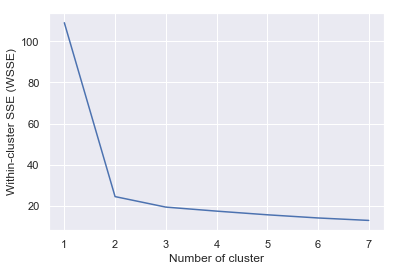

In [304]:
plot_sse_kmeans(df_std)

#### Fit k-means

In [305]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', 
                n_jobs=-2, verbose=1, 
                random_state=123)
kmeans.fit(df_std)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 22.948621735963446
start iteration
done sorting
end inner loop
Iteration 1, inertia 22.66238643243627
start iteration
done sorting
end inner loop
Iteration 2, inertia 22.66238643243627
center shift 0.000000e+00 within tolerance 2.696167e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19.812572325523984
start iteration
done sorting
end inner loop
Iteration 1, inertia 19.405031431515717
start iteration
done sorting
end inner loop
Iteration 2, inertia 19.405031431515717
center shift 0.000000e+00 within tolerance 2.696167e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 22.8739284491571
start iteration
done sorting
end inner loop
Iteration 1, inertia 22.742597477771874
start iteration
done sorting
end inner loop
Iteration 2, inertia 22.671375225702292
start iteration
done sorting
end inner loop
Iteration 3, inertia

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-2, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=1)

#### Cluster distribution

In [306]:
kmeans_cluster = kmeans.predict(df_std)
len(kmeans_cluster)
type(kmeans_cluster)

cluster_distribution = pd.Series(kmeans_cluster).value_counts()
cluster_distribution

449

numpy.ndarray

1    224
0    185
2     40
dtype: int64

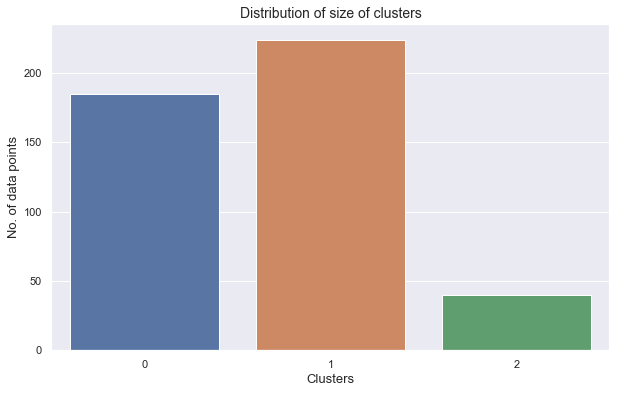

In [315]:
plt.figure(figsize=((10,6)))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values)
plt.title('Distribution of size of clusters', fontsize=14)
plt.xlabel('Clusters',  fontsize=13)
plt.ylabel('No. of data points', fontsize=13)
plt.show();

In [308]:
df.head()
df.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10,SERVICES
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10,CEMENT & CEMENT PRODUCTS
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10,METALS
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10,FINANCIAL SERVICES


(449, 11)

In [309]:
company_clusters = df.copy()
company_clusters['cluster'] = kmeans_cluster
company_clusters.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10,SERVICES,0
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10,CEMENT & CEMENT PRODUCTS,0
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2,INDUSTRIAL MANUFACTURING,1
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10,METALS,0
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10,FINANCIAL SERVICES,0


### Cluster characteristics

In [318]:
cluster_gdf = company_clusters.groupby(by='cluster').median()
cluster_gdf

,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
cluster,,,,,,,,,
0,7265.0,534.250,178.25,24.810,0.850,16.31,14.750,10.620,10
1,7918.0,267.975,83.94,22.695,0.905,17.55,14.855,11.415,2
2,12290.0,500.875,154.06,27.955,0.945,18.50,14.935,12.900,5


In [319]:
cluster2 = company_clusters.query('cluster==2')

In [322]:
cluster2

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
21,APOLLOHOSP,19625.0,1411.00,279.14,60.96,0.43,10.64,8.06,14.71,5,HEALTHCARE SERVICES,2
24,ASHOKA,2736.0,97.45,78.80,8.82,0.00,21.74,15.24,25.39,5,CONSTRUCTION,2
40,BAJAJFINSV,130810.0,8220.00,198.63,433.76,0.03,10.79,10.17,21.59,5,FINANCIAL SERVICES,2
46,BATAINDIA,21615.0,1682.00,135.89,62.14,0.37,30.67,20.52,6.63,5,CONSUMER GOODS,2
55,BIOCON,27432.0,228.60,59.30,97.50,0.22,4.82,4.79,7.81,5,PHARMA,2
76,CASTROLIND,12864.0,130.05,12.21,17.62,3.84,101.00,64.81,5.79,5,ENERGY,2
80,CERA,3292.0,2531.00,538.34,28.97,0.51,27.16,17.59,13.83,5,CONSTRUCTION,2
89,CONCOR,34961.0,573.80,170.16,29.36,1.49,16.50,12.29,5.14,5,SERVICES,2
91,COX&KINGS,56.5,3.20,173.18,0.38,31.25,8.55,6.00,76.06,5,SERVICES,2
95,CYIENT,4950.0,450.10,203.37,11.52,3.35,25.24,20.51,9.04,5,IT,2


In [323]:
cluster0 = company_clusters.query('cluster==0')

In [324]:
cluster0

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry,cluster
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10,SERVICES,0
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10,CEMENT & CEMENT PRODUCTS,0
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10,METALS,0
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10,FINANCIAL SERVICES,0
5,AAVAS,12500.0,1599.00,235.00,65.39,0.00,10.86,11.62,54.94,10,FINANCIAL SERVICES,0
6,ABBOTINDIA,22657.0,10662.00,945.22,46.73,0.61,37.36,24.00,12.06,10,PHARMA,0
9,ADANITRANS,24707.0,224.65,46.90,1933.00,0.00,8.38,2.10,44.78,10,ENERGY,0
10,ABFRL,16049.0,207.45,18.47,47.60,0.00,12.33,25.56,10.40,10,CONSUMER GOODS,0
14,AKZOINDIA,8525.0,1872.00,249.35,38.04,1.28,24.15,15.97,3.40,10,CONSUMER GOODS,0
19,AMBER,2768.0,880.35,310.12,24.67,0.00,14.28,9.90,30.10,10,CONSUMER GOODS,0
